In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [15]:
df1 = pd.read_csv(r"C:\Users\ranga\OneDrive\Desktop\BMW-Tech-Works\Task 2\Dataset\table_1.csv", delimiter=';')
df2 = pd.read_csv(r"C:\Users\ranga\OneDrive\Desktop\BMW-Tech-Works\Task 2\Dataset\table_2.csv", delimiter=';')

In [18]:
data = pd.merge(df1, df2, on="ID", how="inner")
data.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
3,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
4,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4475 non-null   int64  
 1   UKL     4475 non-null   int64  
 2   GJAH    4401 non-null   object 
 3   ZIK     1867 non-null   object 
 4   HUI     4475 non-null   object 
 5   ERZ     4401 non-null   object 
 6   CDx     4475 non-null   float64
 7   BJZHD   4398 non-null   object 
 8   NKJUD   4361 non-null   float64
 9   LPI     4361 non-null   float64
 10  BJKG    4398 non-null   object 
 11  POUG    4475 non-null   int64  
 12  TRE     4475 non-null   float64
 13  ZUB     4475 non-null   object 
 14  VOL     4475 non-null   object 
 15  UIO     4430 non-null   object 
 16  VBNM    4475 non-null   object 
 17  Type    4475 non-null   object 
 18  OIN     4429 non-null   float64
dtypes: float64(5), int64(3), object(11)
memory usage: 664.4+ KB


In [20]:
data.describe()

,ID,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN
count,4475.000000,4475.000000,4475.000000,4361.000000,4.361000e+03,4475.00000,4475.000000,4429.000000
mean,1838.977430,96.316872,2286.035531,163.132538,1.631325e+06,4.13743,3.392010,32.707180
std,1069.445348,56.013921,8938.486172,154.868928,1.548689e+06,6.73863,4.281415,12.602387
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,13.750000
25%,898.500000,47.000000,0.000000,0.000000,0.000000e+00,0.00000,0.500000,22.920000
50%,1838.000000,101.000000,113.000000,120.000000,1.200000e+06,2.00000,1.750000,28.670000
75%,2766.500000,152.000000,1000.000000,280.000000,2.800000e+06,6.00000,5.000000,40.000000
max,3699.000000,179.000000,100000.000000,1160.000000,1.160000e+07,67.00000,28.500000,80.250000


In [26]:
print(data["Type"].value_counts())
print(data['Type'].value_counts(normalize=True))

Type
y    4135
n     340
Name: count, dtype: int64
Type
y    0.924022
n    0.075978
Name: proportion, dtype: float64


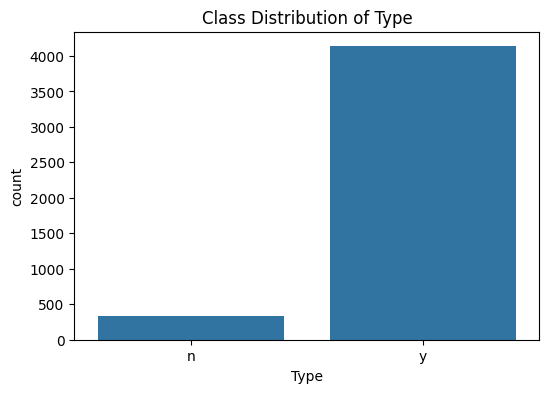

In [29]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=data)
plt.title('Class Distribution of Type')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           n       1.00      0.88      0.94        68
           y       0.99      1.00      1.00       827

    accuracy                           0.99       895
   macro avg       1.00      0.94      0.97       895
weighted avg       0.99      0.99      0.99       895

ROC-AUC Score: 1.0


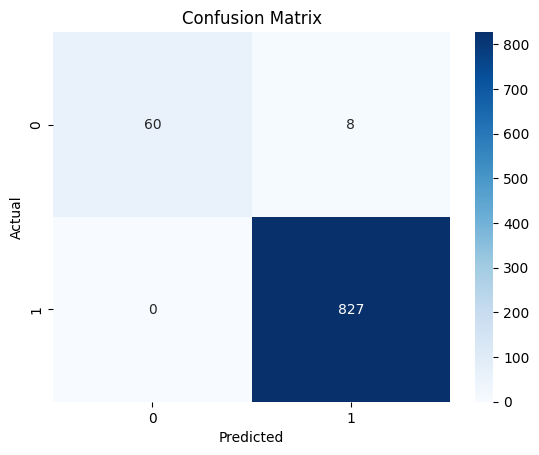

In [32]:
X = data.drop(['Type', 'ID'], axis=1)
y = data['Type']

# Step 5: Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Step 6: Define preprocessing pipelines
# Numerical pipeline: impute missing values with mean and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 7: Define the model with default class balancing
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 8: Create the full pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 10: Train the model
clf.fit(X_train, y_train)

# Step 11: Predict and evaluate
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
